In [1]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\49171\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

c:\users\49171\appdata\local\programs\python\python38\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\users\49171\appdata\local\programs\python\python38\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
c:\users\49171\appdata\local\programs\python\python38\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [3]:
#df = pd.read_excel('dt_analysis.xlsx', index_col=0)
df = pd.read_csv('dt_analysis.csv')

In [4]:
#df.drop(df.columns[10:], axis=1, inplace=True)
df.head()

,decision_tree,dataset,language,splitting_criterion,rows,columns,leaf_nodes,depth,accuracy,generation_time,prediction_time
0,d1,heart failure prediction,r,gini,299,13,4,4,80.41,0.010996,0.004000
1,d2,heart failure prediction,r,gain ratio,299,13,7,7,78.35,0.084039,0.020002
2,d3,heart failure prediction,r,gain ratio,299,13,6,5,80.41,0.014001,0.007999
3,d4,heart failure prediction,python,gini,299,13,28,9,67.01,0.006842,0.002096
4,d5,heart failure prediction,python,info gain,299,13,25,9,74.22,0.002834,0.001789


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   decision_tree        42 non-null     object 
 1   dataset              42 non-null     object 
 2   language             42 non-null     object 
 3   splitting_criterion  42 non-null     object 
 4   rows                 42 non-null     int64  
 5   columns              42 non-null     int64  
 6   leaf_nodes           42 non-null     int64  
 7   depth                42 non-null     int64  
 8   accuracy             42 non-null     float64
 9   generation_time      42 non-null     float64
 10  prediction_time      42 non-null     float64
dtypes: float64(3), int64(4), object(4)
memory usage: 3.7+ KB


<AxesSubplot:xlabel='language'>

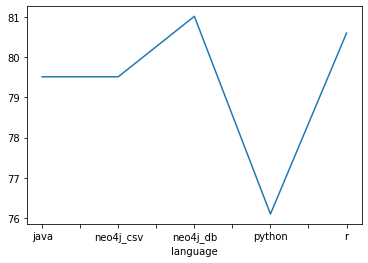

In [6]:
acc_df = df.groupby(['language']).mean()['accuracy']
acc_df.plot.line()

c:\users\49171\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='language', ylabel='accuracy'>

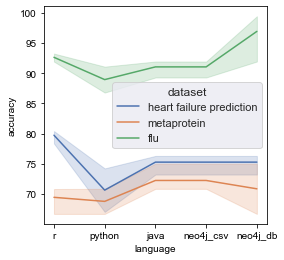

In [7]:
fig_dims = (4, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.set(font_scale=1)
sns.lineplot('language','accuracy',  data =df, hue='dataset', ax=ax)

c:\users\49171\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='splitting_criterion', ylabel='accuracy'>

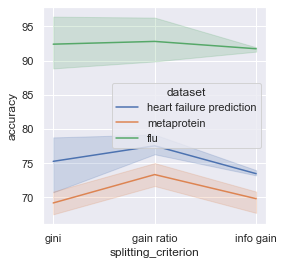

In [8]:
fig_dims = (4, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.set(font_scale=1)
sns.lineplot('splitting_criterion','accuracy',  data =df, hue='dataset', ax=ax)


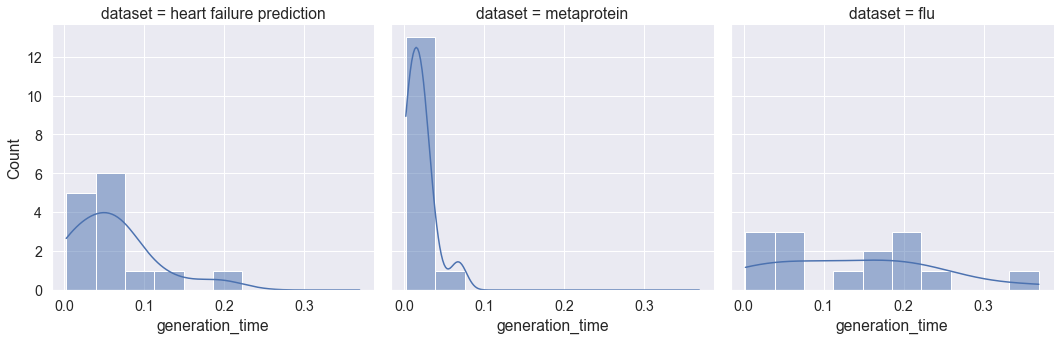

In [29]:
fig_dims = (8, 6)
sns.displot(data=df, x="generation_time",col= "dataset", kde=True)

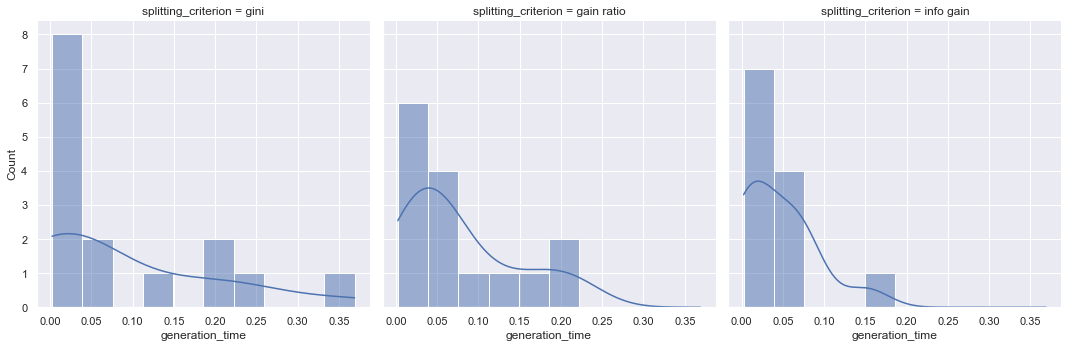

In [10]:
sns.displot(data=df, x="generation_time",col= "splitting_criterion", kde=True)

No handles with labels found to put in legend.
c:\users\49171\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No handles with labels found to put in legend.
c:\users\49171\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipython-input-106-92292808f673>:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


[Text(0.5, 0, '')]

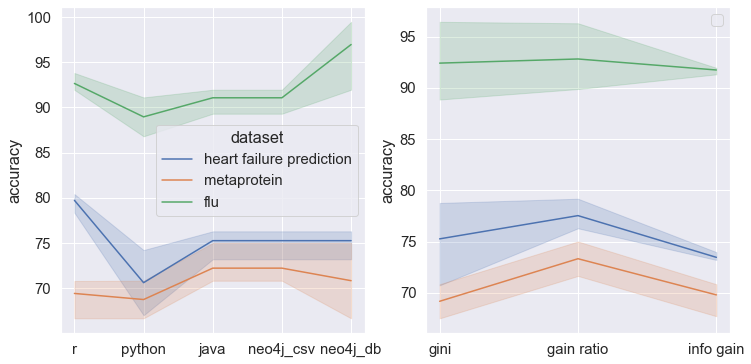

In [106]:
sns.set(font_scale=1.35)
fig_dims = (12, 6)
fig, ax =plt.subplots(1,2, figsize=fig_dims)
plt.legend(fontsize='x-large', title_fontsize='40')
#sns.countplot(df['batting'], ax=ax[0])
fig1=sns.lineplot('language','accuracy',  data =df, hue='dataset', ax=ax[0], legend=True)
plt.legend(loc='best')
#plt.setp(fig1.get_legend().get_texts(), fontsize='10') 

fig2 = sns.lineplot('splitting_criterion','accuracy',  data =df, hue='dataset', ax=ax[1], legend=False)
fig.show()
fig1.set(xlabel=None)
fig2.set(xlabel=None)

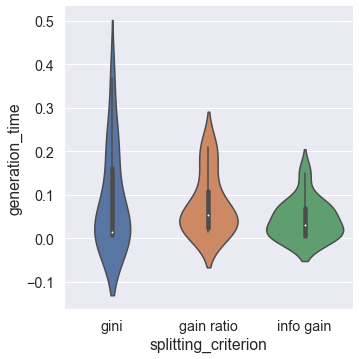

In [12]:

sns.catplot(data=df, kind="violin", x="splitting_criterion", y="generation_time")

[Text(0.5, 0, '')]

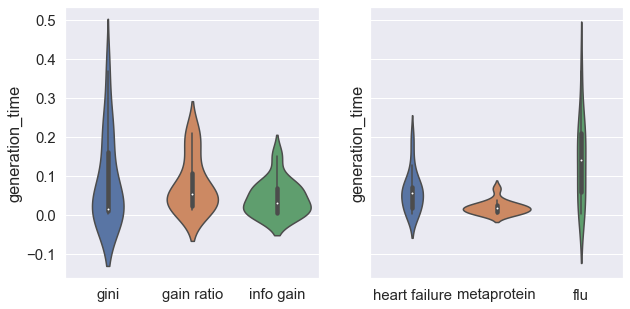

In [87]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey=True)
#fig.suptitle('Violin plot generation time(in sec)')

violin1 = sns.violinplot(ax = axes[0], data=df, kind="violin", x="splitting_criterion", y="generation_time")
#axes[0].set_title("HELLO")

violin2 = sns.violinplot(ax = axes[1], data=df, kind="violin", x="dataset", y="generation_time")
#axes[1].set_title("world")
violin2.set_xticklabels(['heart failure','metaprotein','flu'])
violin1.set(xlabel=None)
violin2.set(xlabel=None)

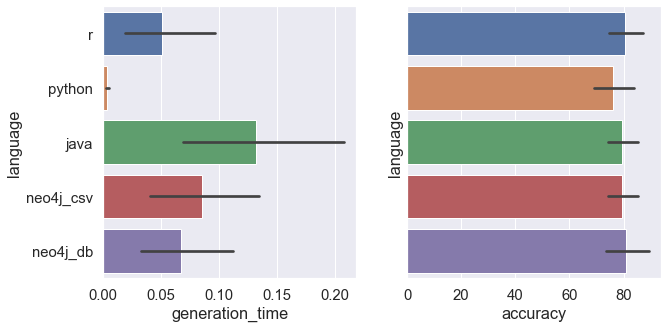

In [97]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

bar3= sns.barplot(ax = axes[0], data=df, x="generation_time", y="language")
bar4= sns.barplot(ax = axes[1],data=df, x="accuracy", y="language")

In [15]:
neo_df = df[df['language']=='neo4j_csv']
neo_db_df = df[df['language']=='neo4j_db']
neo_df2 = neo_df.append(neo_db_df, ignore_index=True)
neo_df2
#sns.catplot(data=neo_df2, kind="violin", x="neo4j_csv", y="generation_time")

,decision_tree,dataset,language,splitting_criterion,rows,columns,leaf_nodes,depth,accuracy,generation_time,prediction_time
0,d9,heart failure prediction,neo4j_csv,gini,299,13,12,10,76.29,0.128000,0.00100
1,d10,heart failure prediction,neo4j_csv,info gain,299,13,11,9,73.20,0.073000,0.00100
2,d11,heart failure prediction,neo4j_csv,gain ratio,299,13,8,8,76.29,0.057000,0.00100
3,d23,metaprotein,neo4j_csv,gini,48,50,5,4,70.83,0.012000,0.00001
4,d24,metaprotein,neo4j_csv,info gain,48,50,5,4,70.83,0.004999,0.00001
5,d25,metaprotein,neo4j_csv,gain ratio,48,50,5,4,75.00,0.018999,0.00001
6,d37,flu,neo4j_csv,gini,1485,13,15,6,91.93,0.243000,0.00200
7,d38,flu,neo4j_csv,info gain,1485,13,16,6,91.95,0.068000,0.00100
8,d39,flu,neo4j_csv,gain ratio,1485,13,15,9,89.30,0.166999,0.00100
9,d12,heart failure prediction,neo4j_db,gini,299,13,12,10,76.29,0.057000,0.00000


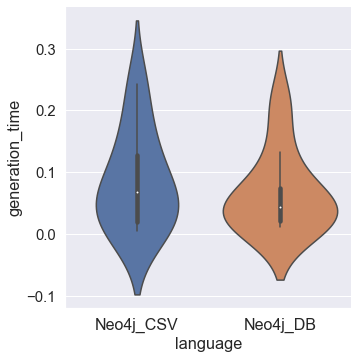

In [40]:
sns.catplot(data=neo_df2, kind="violin", x="language", y="generation_time").set_xticklabels(['Neo4j_CSV','Neo4j_DB'], size=16)

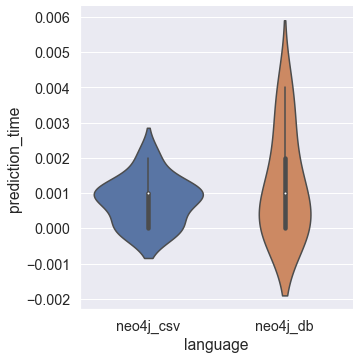

In [17]:
sns.catplot(data=neo_df2, kind="violin", x="language", y="prediction_time")

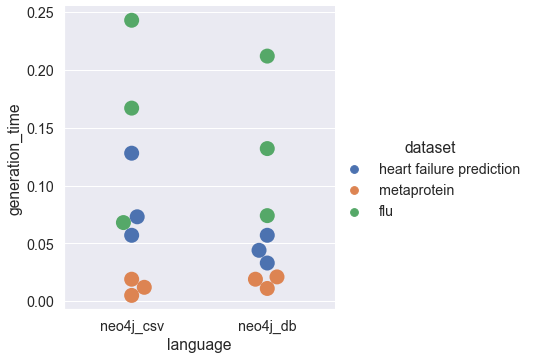

In [18]:
sns.catplot(data=neo_df2, kind="swarm", x="language", y="generation_time", hue="dataset", s = 15)

[Text(0.5, 0, '')]

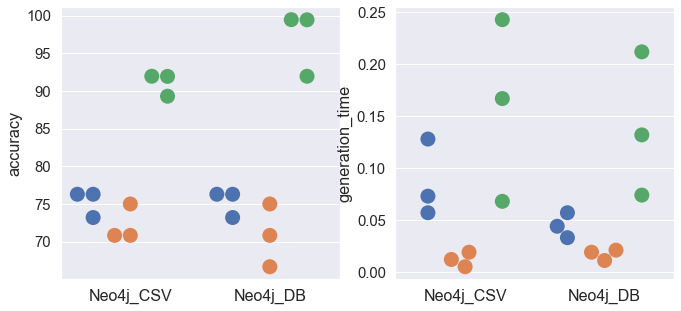

In [57]:
fig, axes = plt.subplots(1, 2, figsize=(11, 5))
#fig.suptitle('Swarm plot generation & prediction time(in sec)')

g = sns.swarmplot(data=neo_df2, x="language", y="accuracy", hue="dataset", ax = axes[0], s=15, dodge=True)

#sns.violinplot(ax = axes[0], data=neo_df2, kind="violin", x="splitting_criterion", y="generation_time", legend=False)

legend = g.legend()
legend.remove()

g.set_xticklabels(['Neo4j_CSV','Neo4j_DB'], size=16)
g.set(xlabel=None)


h= sns.swarmplot(data=neo_df2, x="language", y="generation_time", hue="dataset",dodge=True, ax=axes[1], s=15)
legend = h.legend()
legend.remove()
h.set_xticklabels(['Neo4j_CSV','Neo4j_DB'], size=16)
h.set(xlabel=None)

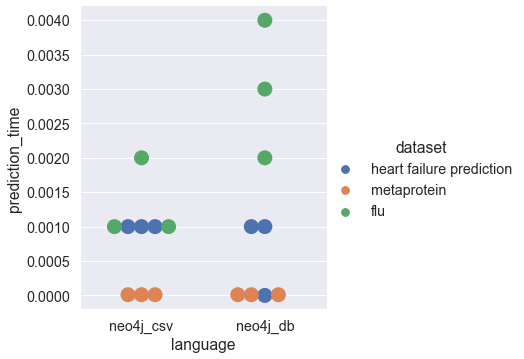

In [20]:
sns.catplot(data=neo_df2, kind="swarm", x="language", y="prediction_time", hue="dataset", s = 15)

In [21]:
def corrfunc(x, y, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    ax.annotate(f'ρ = {r:.2f}', xy=(.1, .9), xycoords=ax.transAxes)

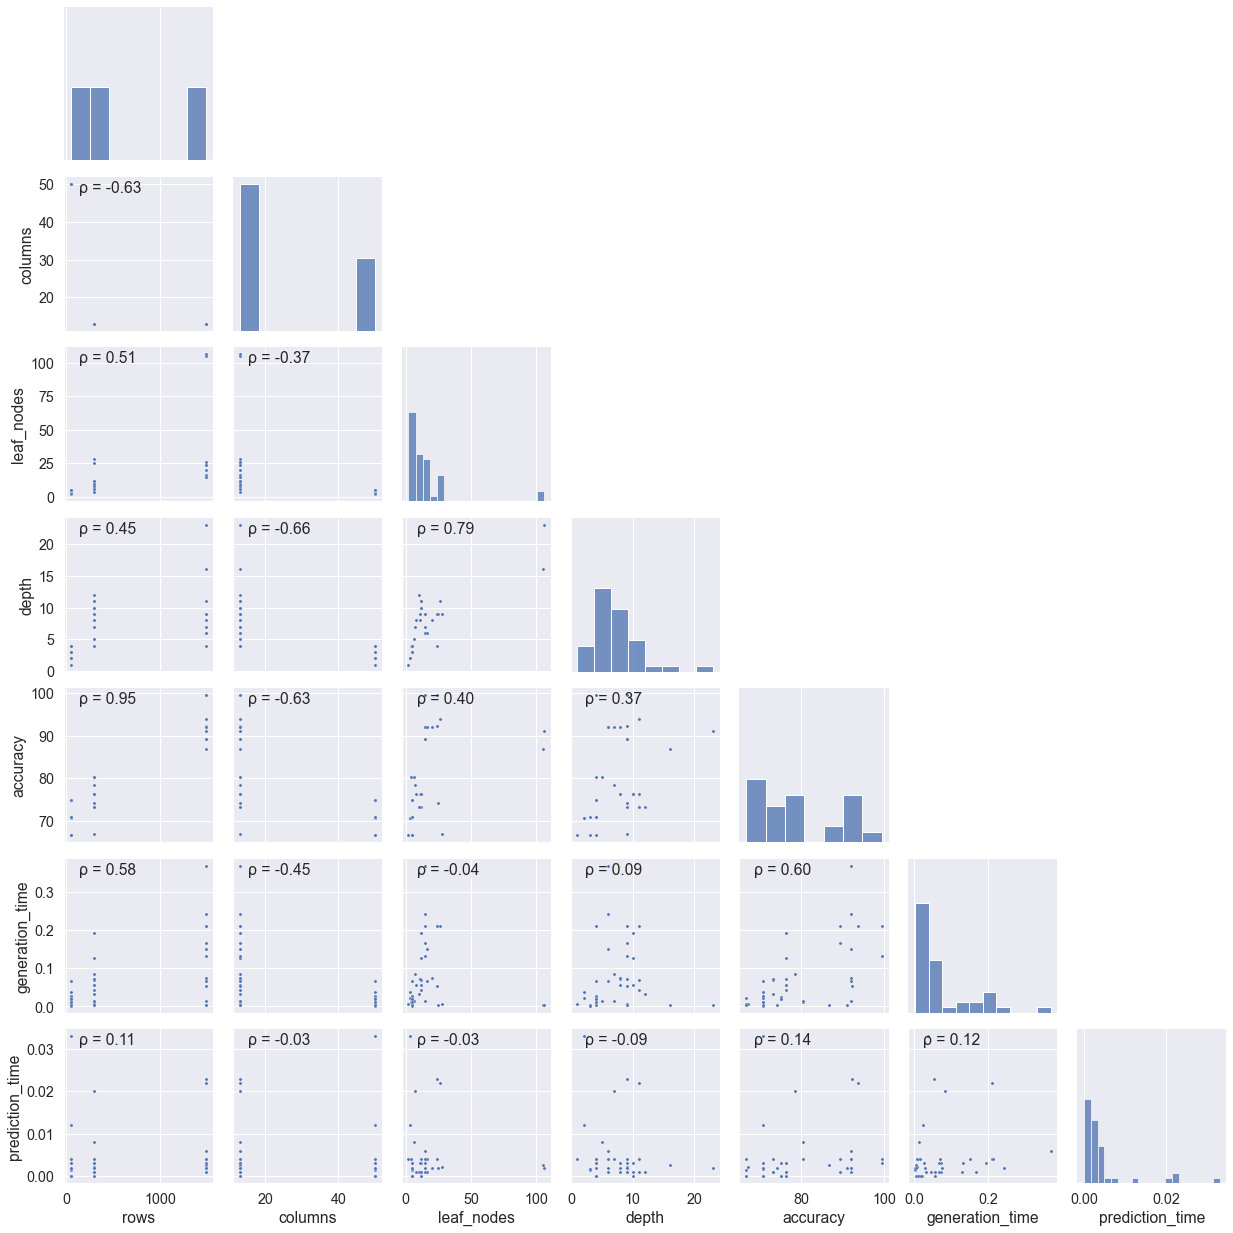

In [22]:
#sns.pairplot(data=df, hue="language", height=2.5)

g = sns.pairplot(df,corner=True,plot_kws={"s": 10})
g.map_lower(corrfunc)
plt.show()

KeyError: 'dataset'

<Figure size 432x288 with 0 Axes>

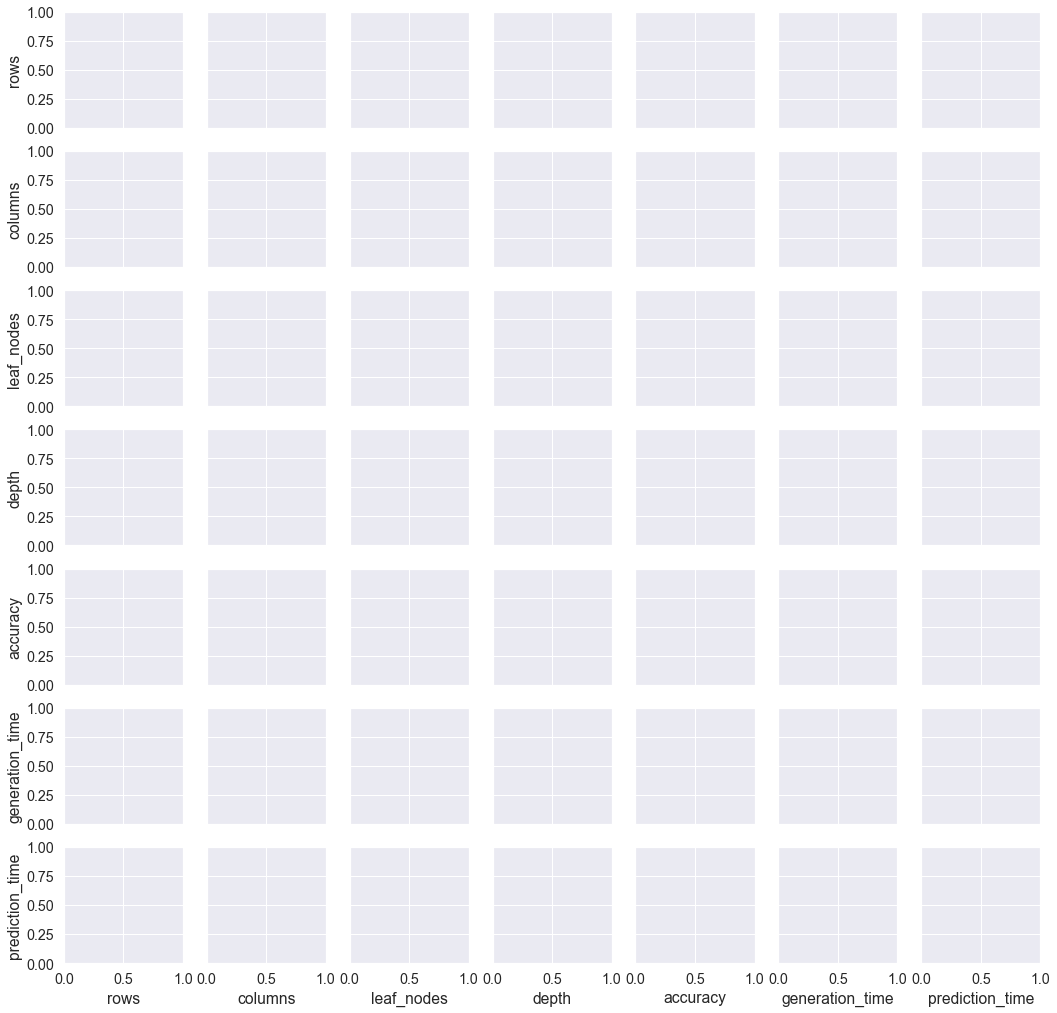

In [23]:
# Plot the remain columns
plt.figure()
cols_to_plot = df.columns[3:].tolist() # Take the remaining columns for the second plot; those already include "Outcome"
sns.pairplot(df[cols_to_plot], hue = "dataset", markers=["o", "s"])
plt.show()

In [ ]:
java_df_gen_time = df[df['language'] == 'java']['generation_time']

In [ ]:
java_df_gen_time

In [ ]:
python_df_gen_time = df[df['language'] == 'python'].sort_values('generation_time', ascending = True)['generation_time']

In [ ]:
#r_df_gen_time = df[df['language'] == 'r'].sort_values('generation_time', ascending = True)['generation_time']
r_df_gen_time = df[df['language'] == 'r']['generation_time']
r_df_gen_time

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


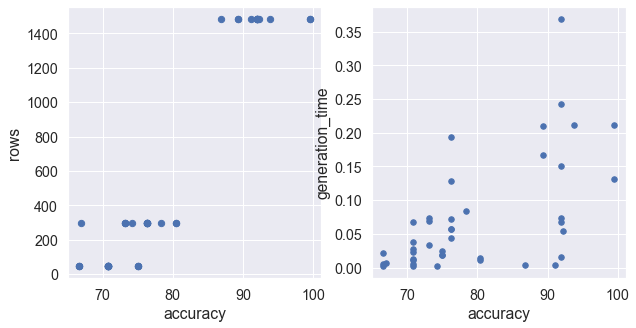

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

a = df.plot(kind='scatter', x='accuracy', y='rows', s=40, ax = axes[0])

b = df.plot(kind='scatter', x='accuracy', y='generation_time', s=30, ax=axes[1])